# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-10"

## Introduction

Level 1 annotation of main cell types

## Libraries

In [2]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [3]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_99_100/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [4]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_T0_CD45pos.rds")))

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_T0_CD45pos.csv")))

Rows: 18882 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


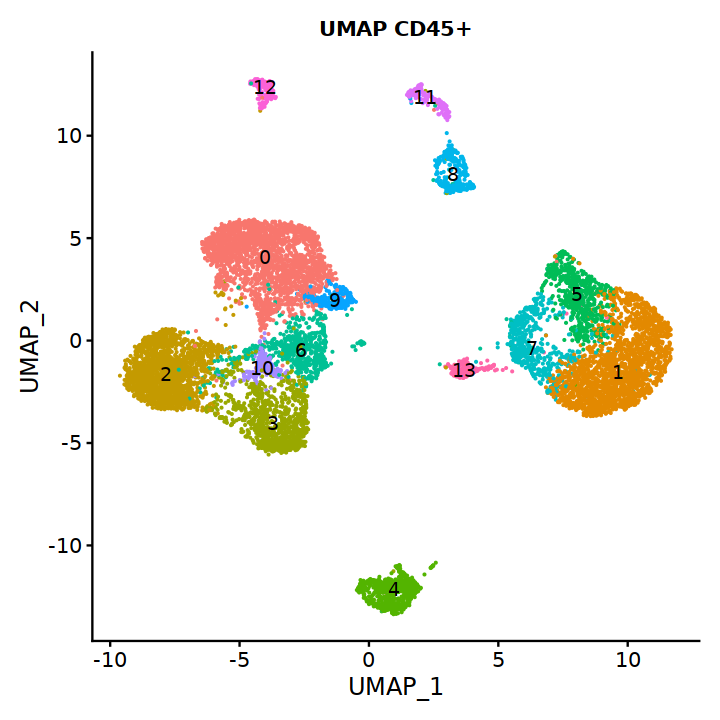

In [5]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label=T
) + NoLegend() + ggtitle(glue('UMAP CD45+')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [6]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B",
            "SELL","IL7R","CX3CR1","GZMK","FOXP3", "PDCD1")

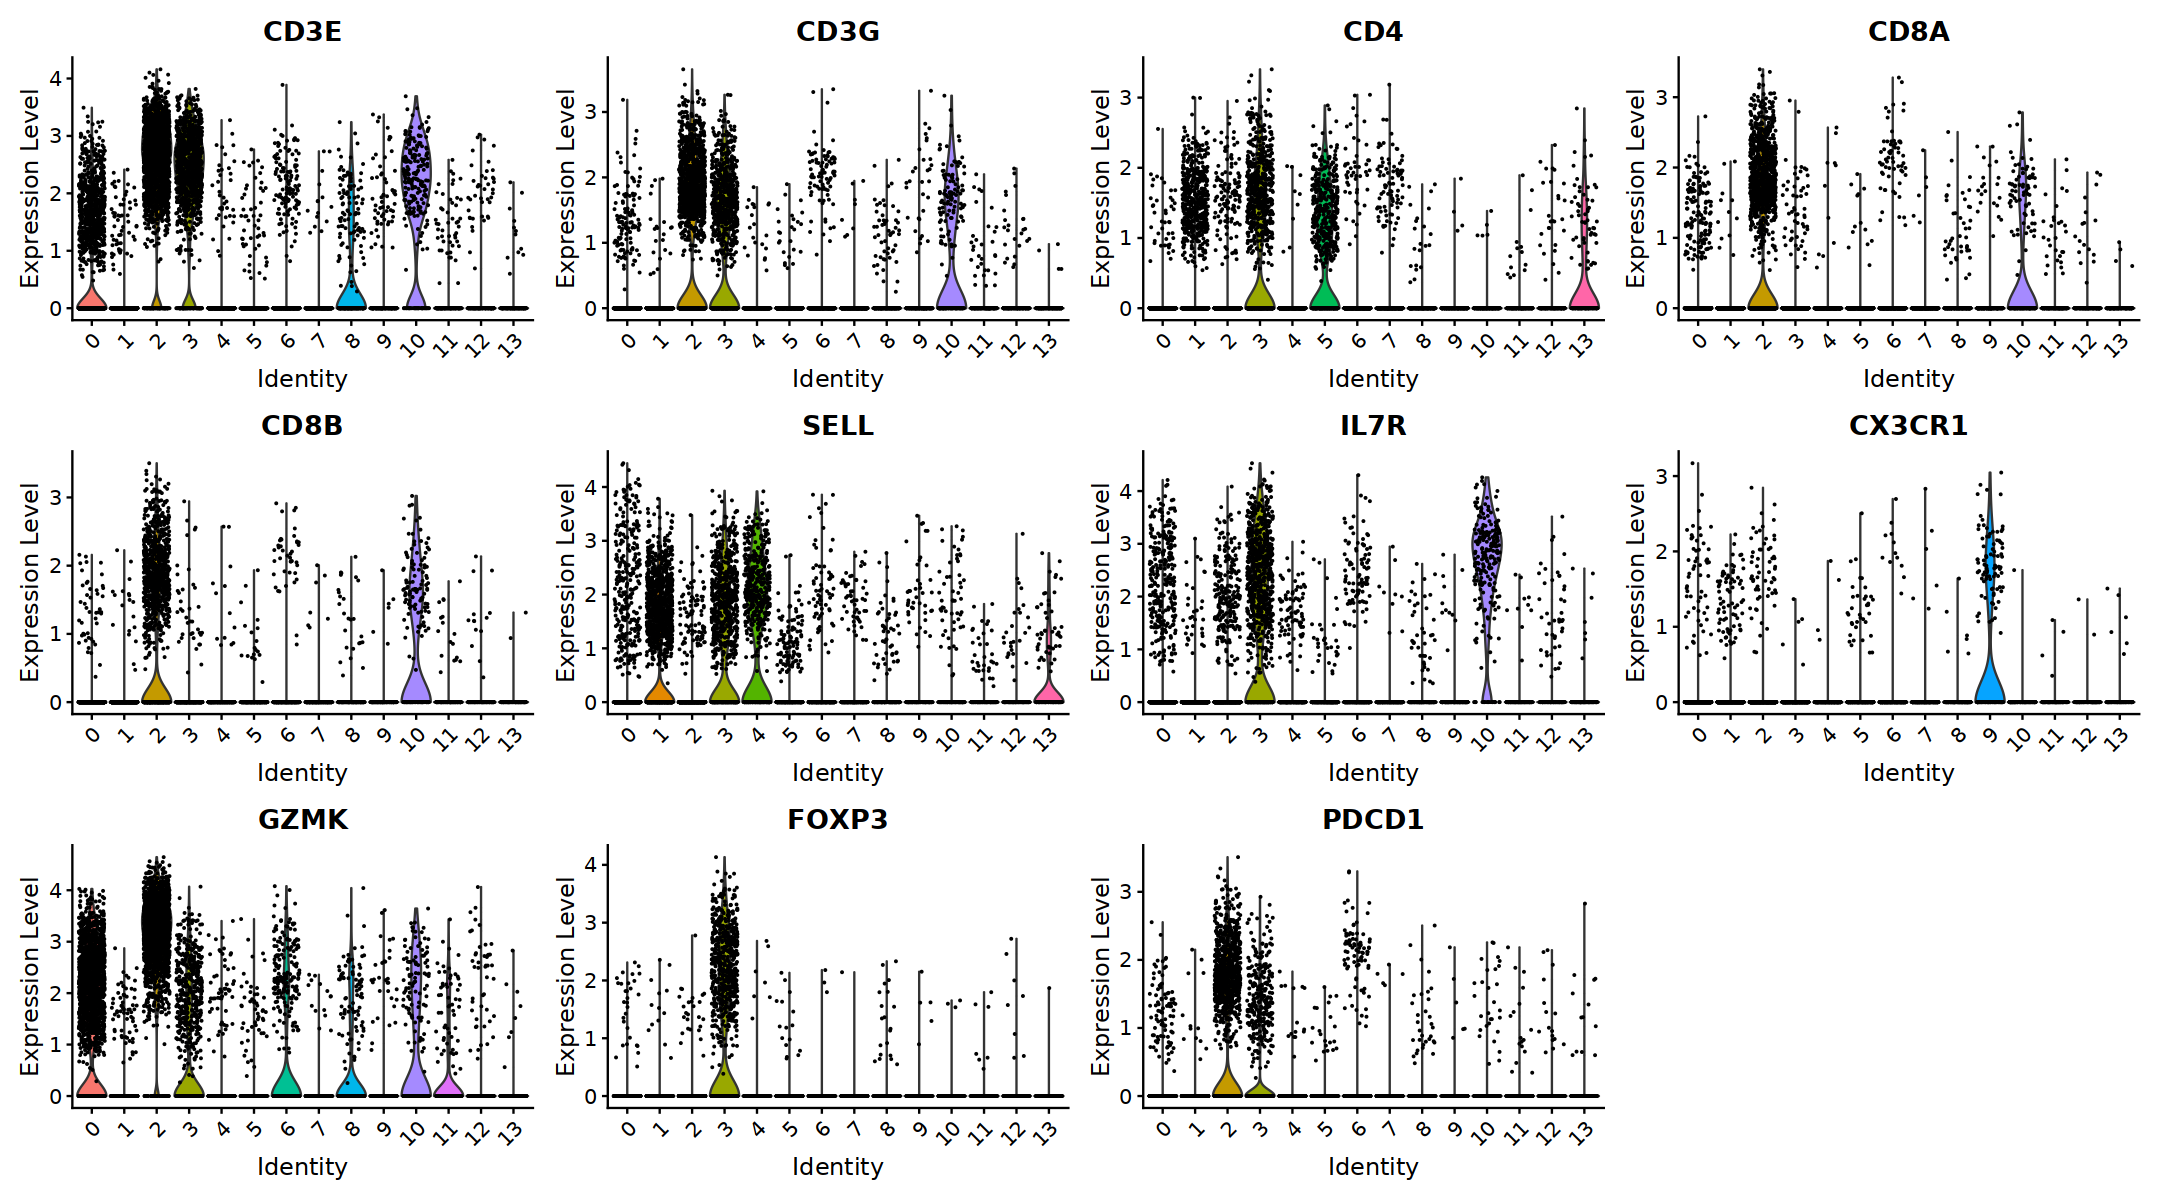

In [7]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### Natural Killers

In [8]:
markers = c("NCAM1", "FCGR3A", "CX3CR1", "GNLY", "KLRC2", 
            "KLRD1", "KLRC3", "KLRK1", "KLRC1", "GNLY", "NKG7")

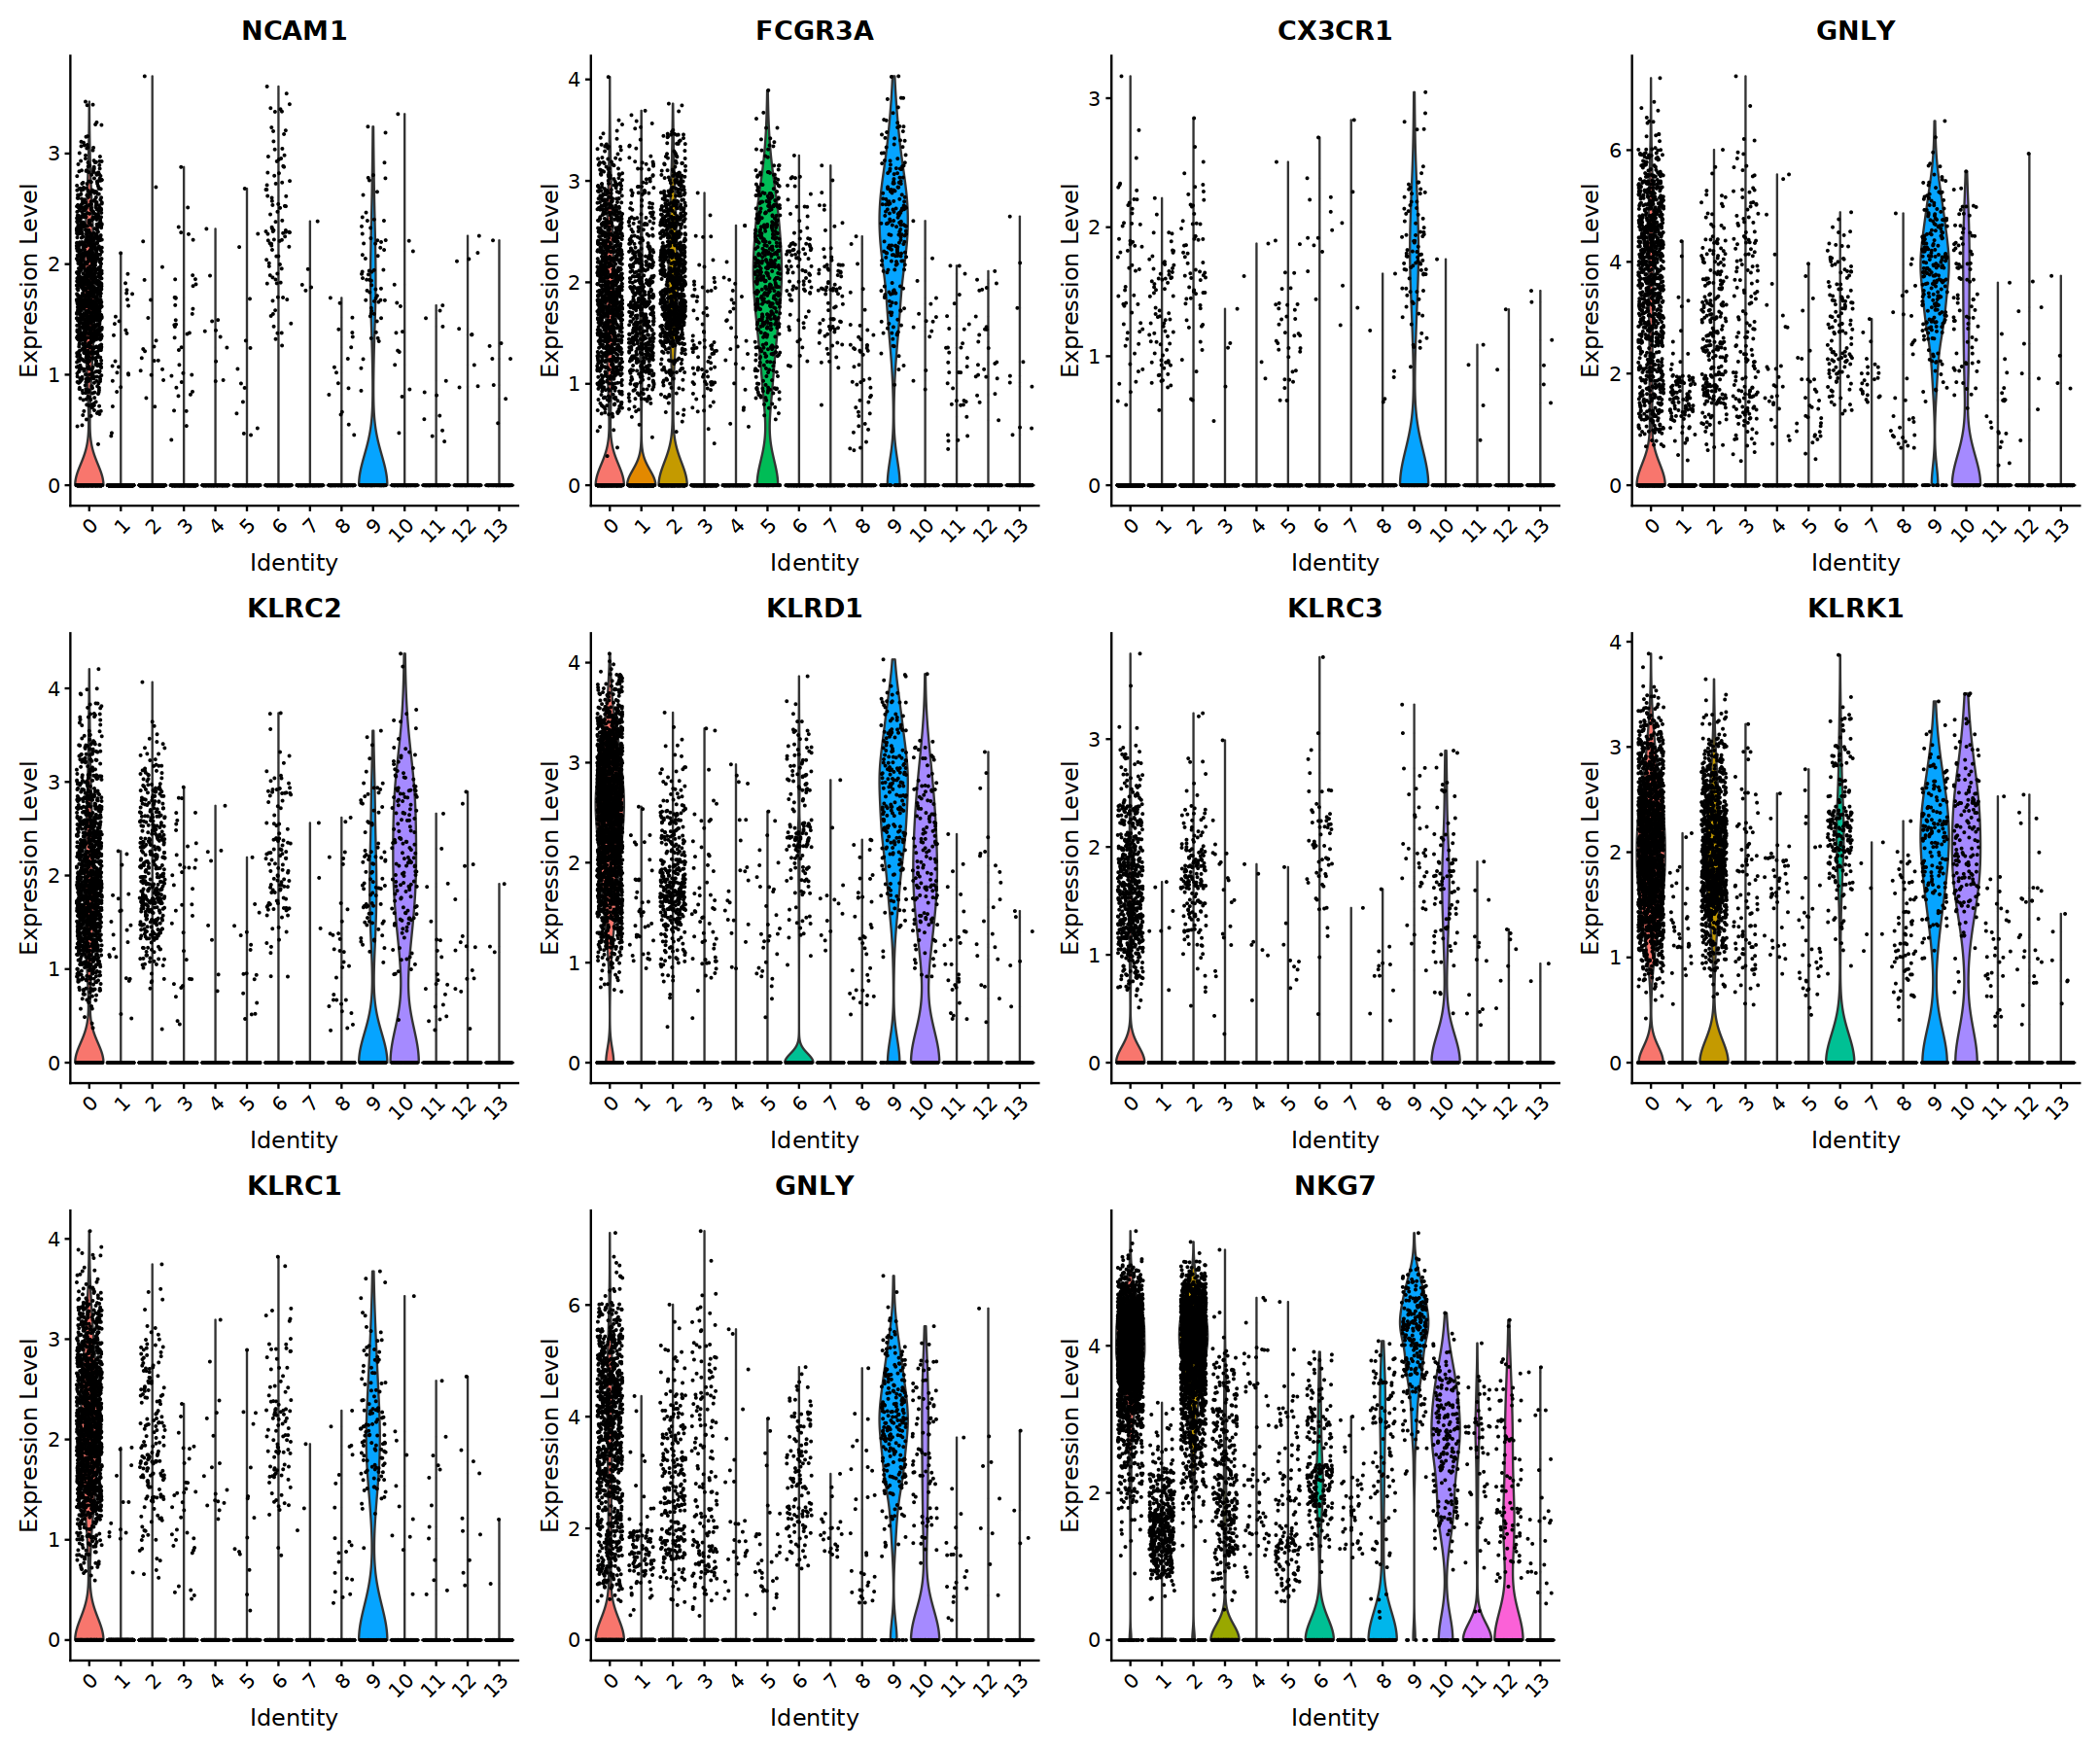

In [9]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### B-cells

In [10]:
markers = c("CD19","MS4A1","CCR7", "SELL","ITGAX", 
            "CD79A","CD79B","JCHAIN","IGHA1")

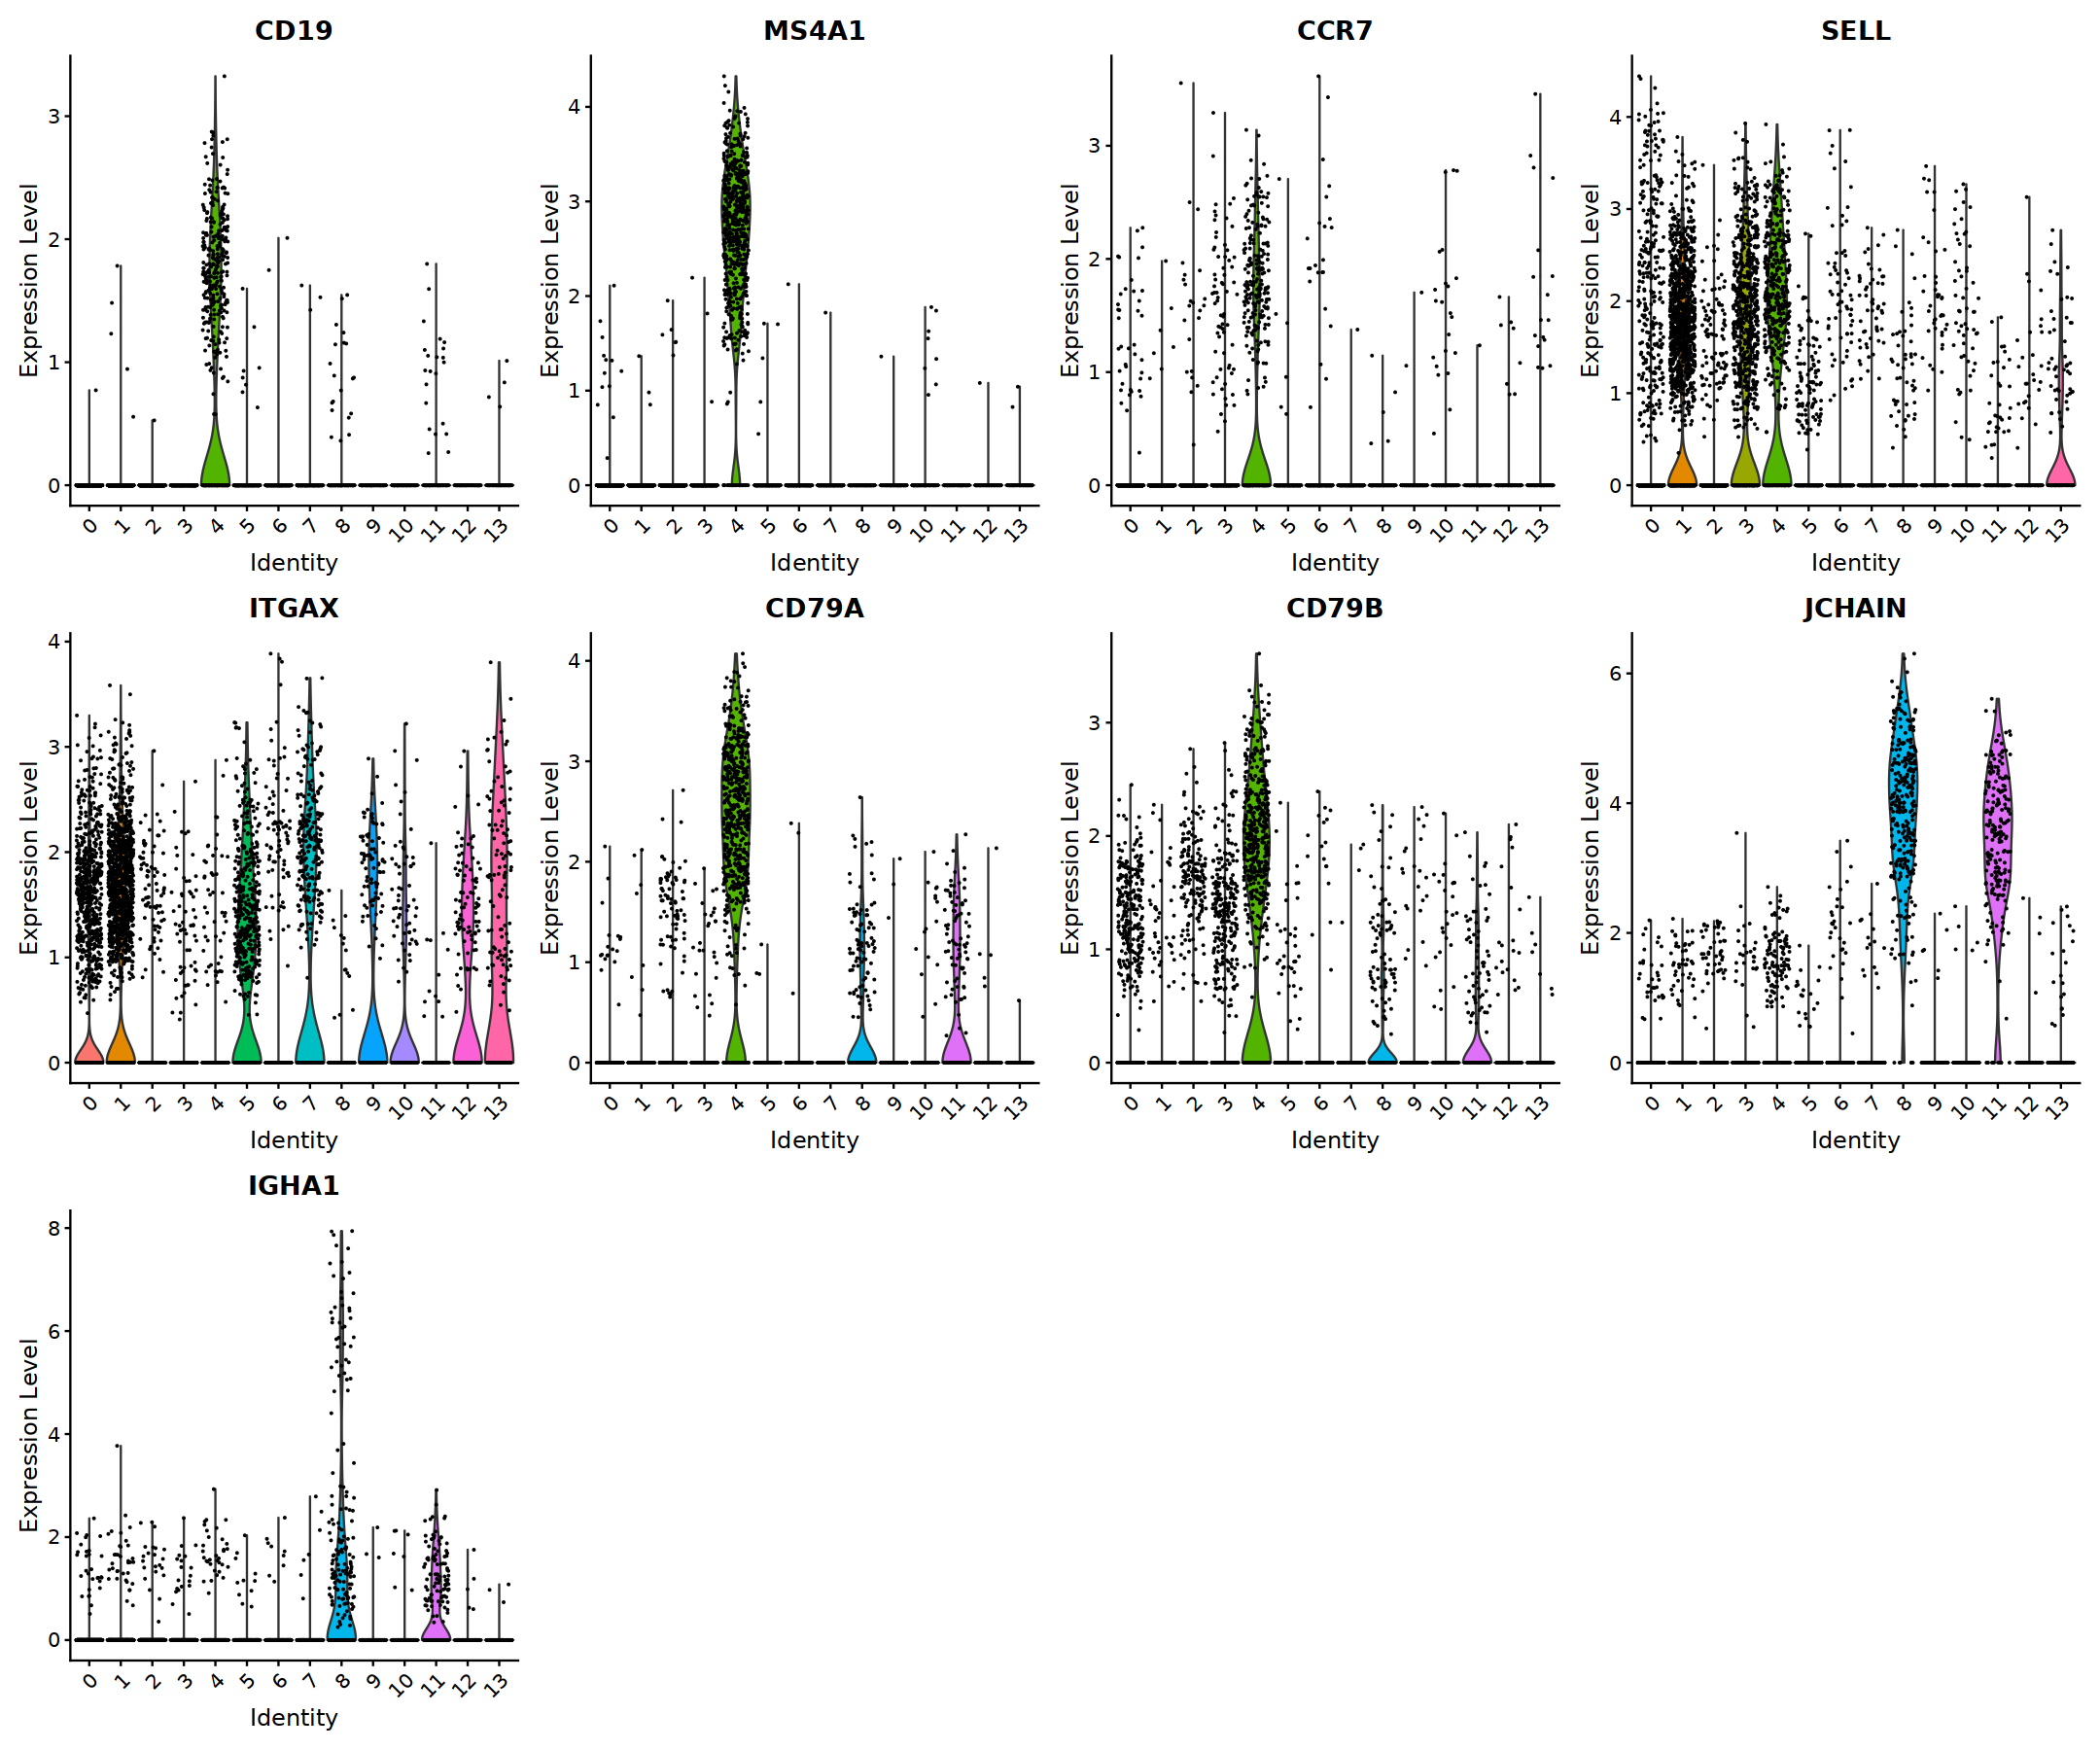

In [11]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### Monocytes 

In [12]:
markers = c("CD14", "S100A8", "S100A9", "LYZ", "VCAN", 
            "FCN1","FCGR3A", "CX3CR1", "HLA-DRB1", "HLA-DRA")

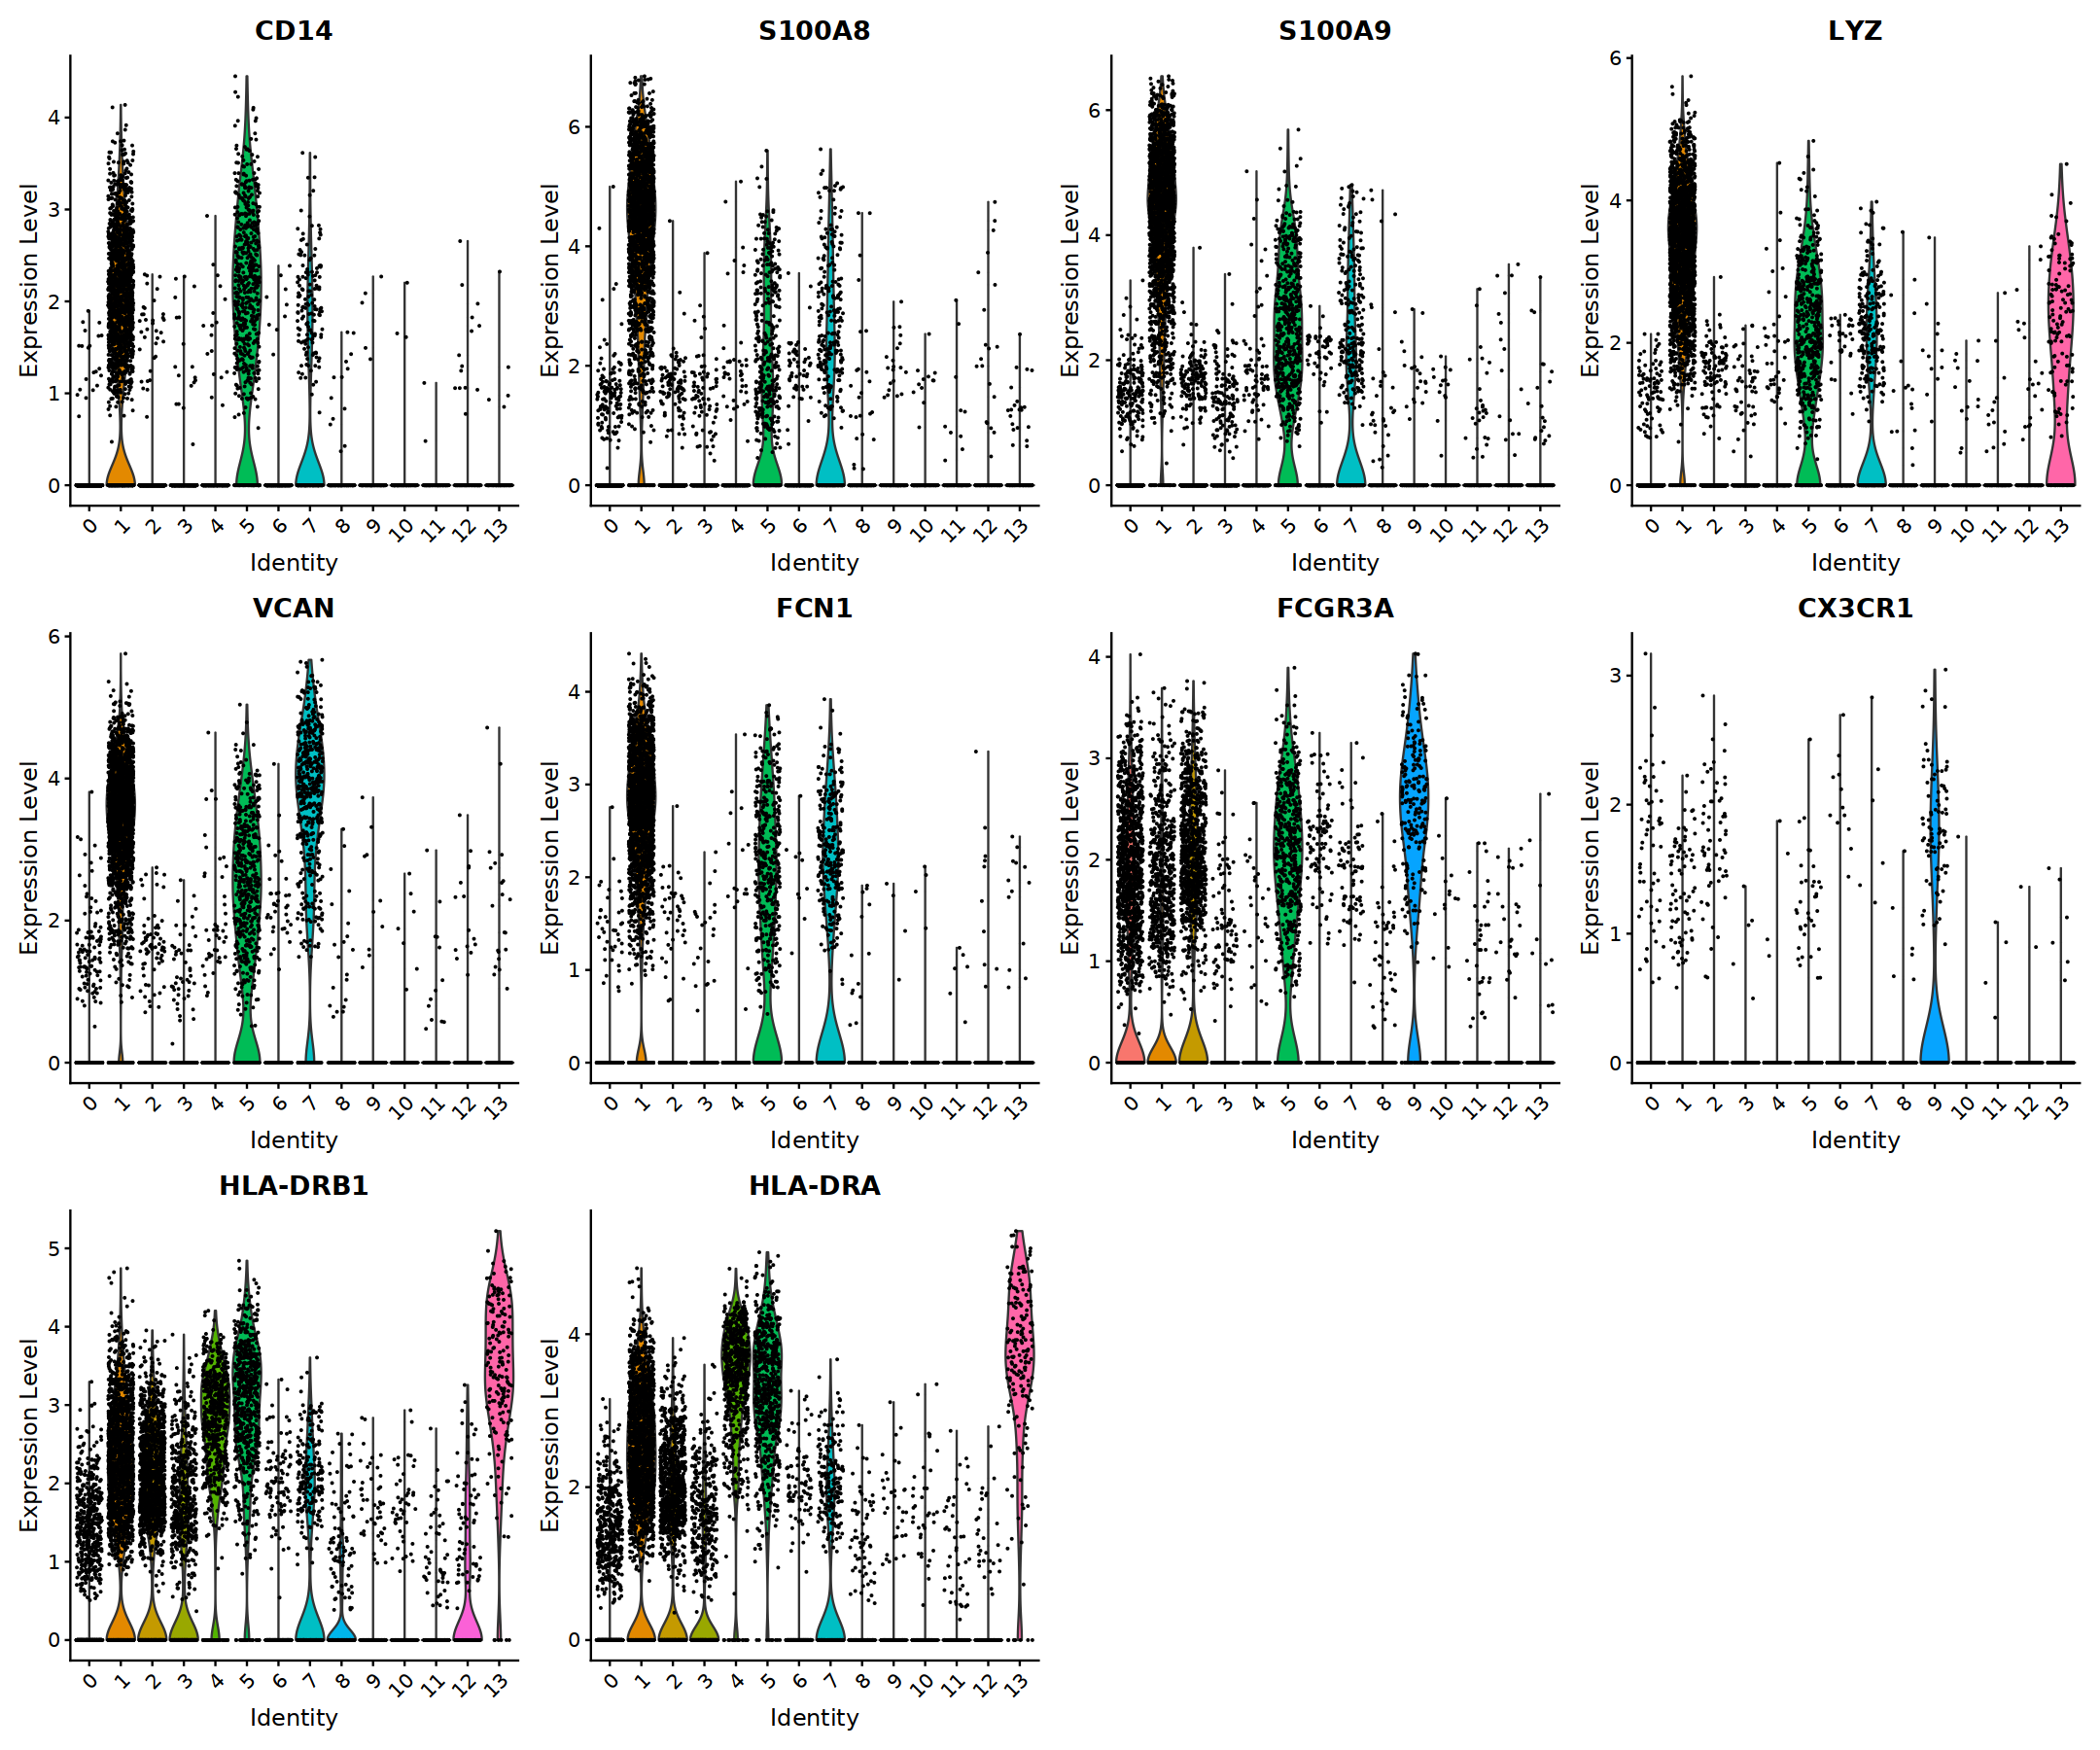

In [13]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### Dendritic cells

In [14]:
markers = c("CLEC9A", "XCR1", "IDO1","FCER1A", "CLEC10A",
            "ITGAX","SIGLEC6","IL3RA","JCHAIN")

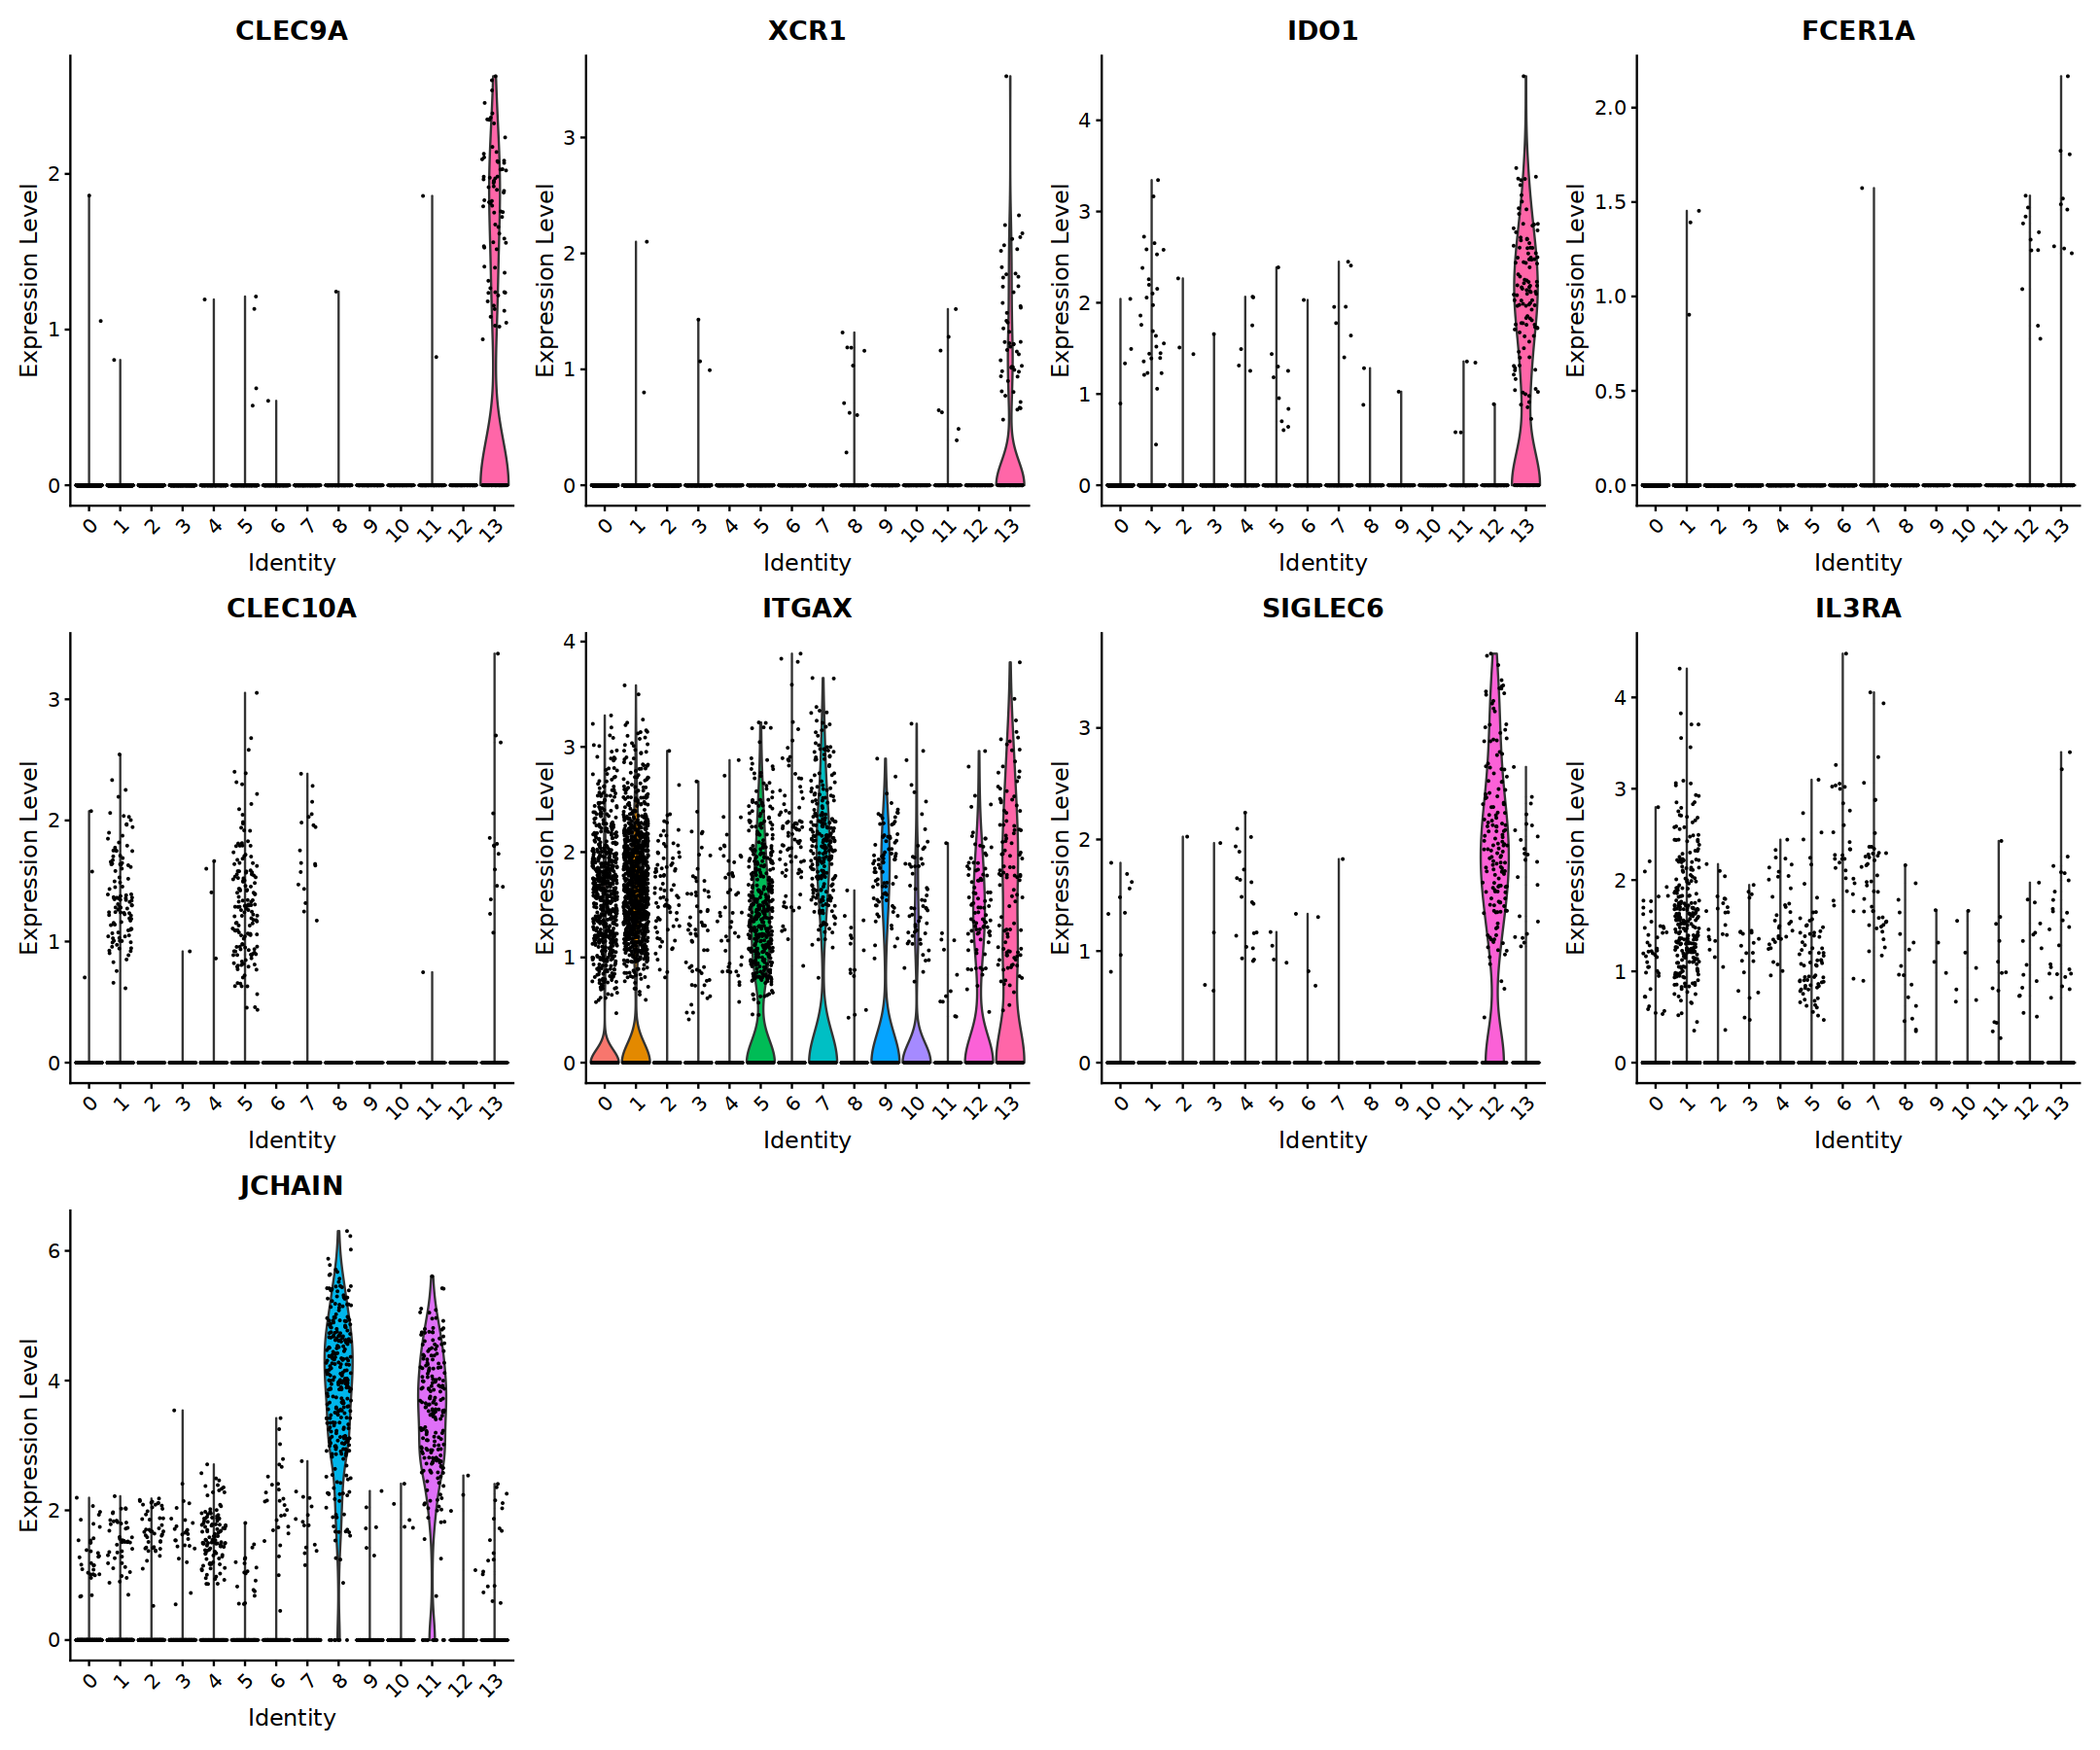

In [15]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

In [16]:
c <- 13
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene    
1 1.915677e-168 4.018505   0.904 0.057 5.322324e-164 13      CCSER1  
2  1.258049e-96 3.503520   0.904 0.206  3.495237e-92 13      HDAC9   
3  1.239022e-95 3.152199   0.708 0.093  3.442375e-91 13      WDFY4   
4  3.057507e-69 2.904573   0.944 0.449  8.494671e-65 13      HLA-DPA1
5  3.448433e-79 2.827634   0.888 0.273  9.580782e-75 13      HLA-DQA1
6  2.755492e-79 2.827570   0.949 0.363  7.655584e-75 13      HLA-DPB1

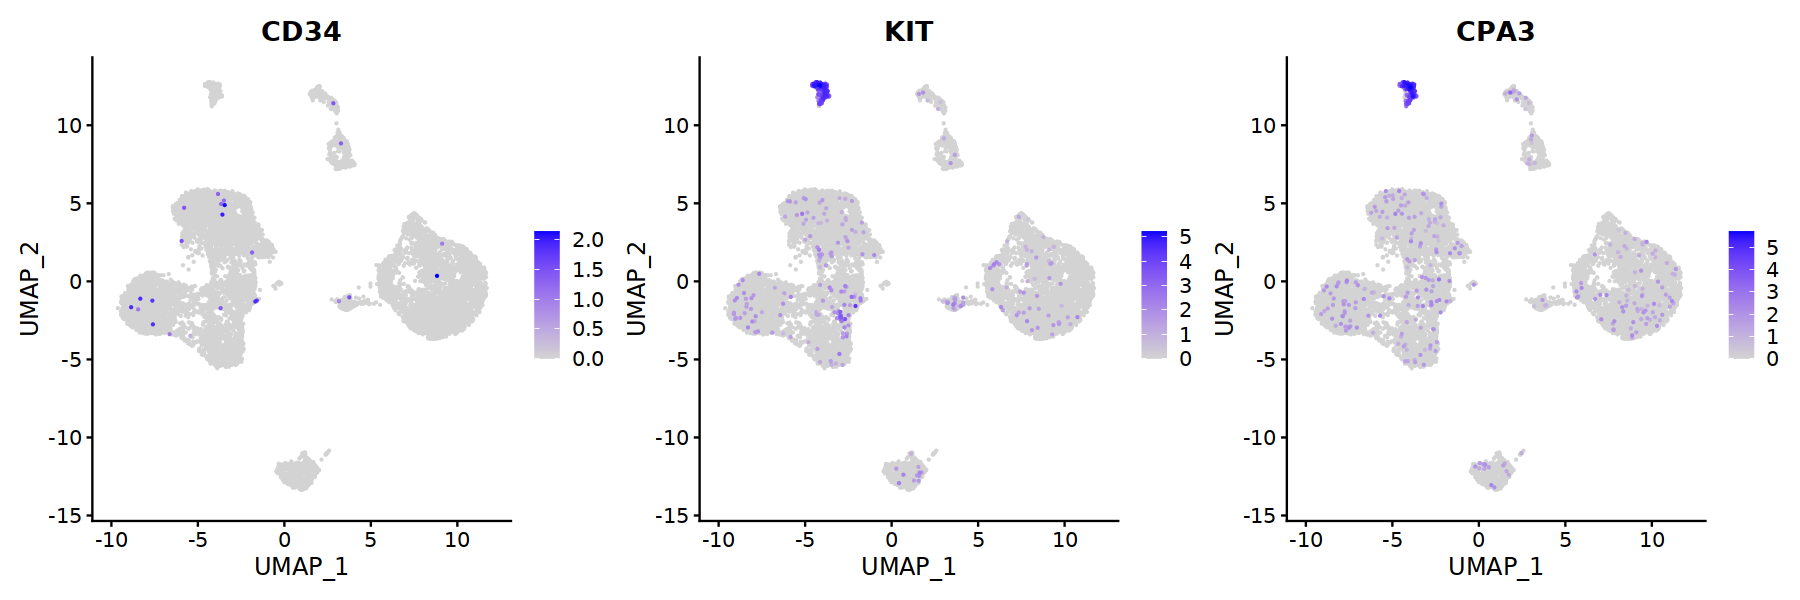

In [17]:
options(repr.plot.width = 15, repr.plot.height = 5, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", 
            features= c("CD34", "KIT", "CPA3"), 
            order = TRUE, ncol=3)

In [18]:
c <- 0
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene 
1 6.695658e-166 2.981826   0.645 0.056 1.860255e-161 0       XCL1 
2 7.429479e-161 2.970384   0.786 0.219 2.064132e-156 0       CCL3 
3 4.759505e-282 2.625803   0.945 0.130 1.322333e-277 0       KLRD1
4 4.468961e-162 2.512475   0.610 0.045 1.241611e-157 0       XCL2 
5  6.030336e-53 2.498807   0.412 0.127  1.675408e-48 0       GNLY 
6 1.226424e-225 2.446518   0.880 0.148 3.407373e-221 0       KLRB1

## Renaming

In [19]:
rename_clusters= list("0"="NK",
                      "1"="Monocytes",
                      "2"="CD8 T-cells",
                      "3"="Tregs",
                      "4"="B-cells",
                      "5"="Macrophages",
                      "6"="NK",
                      "7"="Macrophages",
                      "8"="Plasma cells",
                      "9"="NK",
                      "10"="CD8 T-cells",
                      "11"="Plasma cells",
                      "12"="Mast cells",
                      "13"="Dendritic cells")
    
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

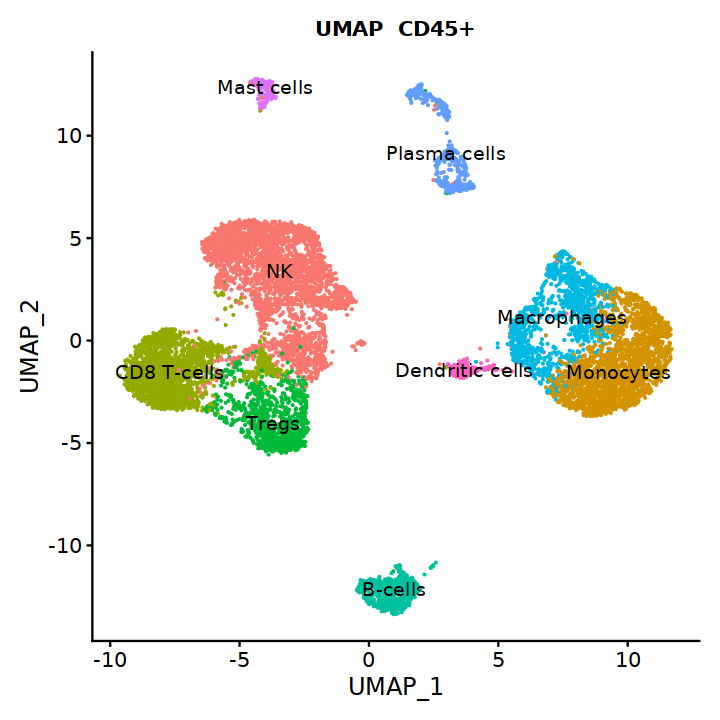

In [20]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP  CD45+')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

In [ ]:
saveRDS(seurat_obj, here(glue("{annot}/{robj_dir}/4.0-l1_T0_CD45pos.rds")))

## Session Info

In [ ]:
sessionInfo()